In [1]:
import pandas as pd

In [2]:
headlines = pd.read_csv('Data/headlines.csv')

In [3]:
headlines.shape

(382139, 8)

In [4]:
headlines.head()

,index,Unnamed: 0,url,headline_no_site,site,time,country,bias
0,0,0,https://www.iol.co.za/entertainment/movies-the...,'Lady Bird' buzzes through young sexuality,iol.co.za,2018-02-23 08:00:00+00:00,South Africa,0.000000
1,1,1,https://www.iol.co.za/entertainment/music/the-...,The shadowy urban POP super Starrah who loves ...,iol.co.za,2018-01-10 08:00:00+00:00,South Africa,0.166667
2,2,2,https://www.iol.co.za/entertainment/celebrity-...,Rihanna pens heartfelt tribute to her mom in b...,iol.co.za,2018-02-21 08:00:00+00:00,South Africa,0.333333
3,3,3,https://www.iol.co.za/news/south-africa/wester...,Shock as woman accused of killing teen girlfri...,iol.co.za,2018-02-27 08:00:00+00:00,South Africa,0.333333
4,4,4,https://www.iol.co.za/business-report/careers/...,TOP STORY: Meet South Africa's new first lady ...,iol.co.za,2018-02-15 08:00:00+00:00,South Africa,0.166667


In [5]:
headlines.isnull().sum()

index               0
Unnamed: 0          0
url                 0
headline_no_site    0
site                0
time                0
country             0
bias                0
dtype: int64

In [6]:
headlines.describe()

,index,Unnamed: 0,bias
count,382139.000000,382139.000000,382139.000000
mean,191069.000000,191069.000000,0.171057
std,110314.171596,110314.171596,0.101210
min,0.000000,0.000000,0.000000
25%,95534.500000,95534.500000,0.166667
50%,191069.000000,191069.000000,0.166667
75%,286603.500000,286603.500000,0.166667
max,382138.000000,382138.000000,1.000000


In [7]:
headlines.drop(['Unnamed: 0', 'url', 'index'], axis=1, inplace=True)
headlines.head()

,headline_no_site,site,time,country,bias
0,'Lady Bird' buzzes through young sexuality,iol.co.za,2018-02-23 08:00:00+00:00,South Africa,0.000000
1,The shadowy urban POP super Starrah who loves ...,iol.co.za,2018-01-10 08:00:00+00:00,South Africa,0.166667
2,Rihanna pens heartfelt tribute to her mom in b...,iol.co.za,2018-02-21 08:00:00+00:00,South Africa,0.333333
3,Shock as woman accused of killing teen girlfri...,iol.co.za,2018-02-27 08:00:00+00:00,South Africa,0.333333
4,TOP STORY: Meet South Africa's new first lady ...,iol.co.za,2018-02-15 08:00:00+00:00,South Africa,0.166667


In [8]:
# Assuming 'headlines' is the name of your dataframe
min_headlines_threshold = 5000
top_sites = headlines['site'].value_counts()
top_sites = top_sites[top_sites >= min_headlines_threshold].index

# Create a new dataframe with only the sites with at least 5000 headlines
headlines_filtered = headlines[headlines['site'].isin(top_sites)].copy()

# Display the value counts for the new dataframe
headlines_filtered['site'].value_counts()


site
dailymail.co.uk        8219
telegraph.co.uk        7596
abcnews.go.com         6305
indiatimes.com         6269
mirror.co.uk           6207
washingtonpost.com     6143
nytimes.com            6032
independent.co.uk      5983
nydailynews.com        5929
express.co.uk          5919
eonline.com            5826
usmagazine.com         5582
metro.co.uk            5538
dnaindia.com           5372
forbes.com             5297
usatoday.com           5239
standard.co.uk         5207
people.com             5125
businessinsider.com    5117
nypost.com             5044
Name: count, dtype: int64

In [9]:
headlines_filtered.head()

,headline_no_site,site,time,country,bias
9207,Mother and Daughter Reunite After 82 Years,abcnews.go.com,2016-02-03 08:00:00+00:00,USA,0.333333
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,abcnews.go.com,2016-01-19 08:00:00+00:00,USA,0.166667
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,abcnews.go.com,2016-02-27 08:00:00+00:00,USA,0.333333
9210,Timeline of Alleged Abduction and Slaying of 1...,abcnews.go.com,2016-02-03 08:00:00+00:00,USA,0.166667
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",abcnews.go.com,2016-02-10 08:00:00+00:00,USA,0.166667


In [10]:
headlines_filtered.shape

(117949, 5)

feature engineering

In [11]:
# Assuming 'headlines' is your DataFrame
headlines_filtered['Word_Count'] = headlines_filtered['headline_no_site'].apply(lambda x: len(x.split()))

In [12]:
from textblob import TextBlob

# Assuming 'headlines' is your DataFrame
headlines_filtered['Sentiment_Polarity'] = headlines_filtered['headline_no_site'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [13]:
headlines_filtered['Text_Length'] = headlines_filtered['headline_no_site'].apply(len)

In [14]:
headlines_filtered['Avg_Word_Length'] = headlines_filtered['Text_Length'] / headlines_filtered['Word_Count']

In [15]:
import datetime

In [16]:
# Date Features
headlines_filtered['Day_of_Week'] = pd.to_datetime(headlines_filtered['time']).dt.day_name()
headlines_filtered['Month'] = pd.to_datetime(headlines_filtered['time']).dt.month

In [17]:
# Time feature
headlines_filtered['Hour_of_Day'] = pd.to_datetime(headlines_filtered['time']).dt.hour

In [18]:
headlines_filtered.head()

,headline_no_site,site,time,country,bias,Word_Count,Sentiment_Polarity,Text_Length,Avg_Word_Length,Day_of_Week,Month,Hour_of_Day
9207,Mother and Daughter Reunite After 82 Years,abcnews.go.com,2016-02-03 08:00:00+00:00,USA,0.333333,7,0.0,42,6.000000,Wednesday,2,8
9208,Hayden Panettiere 'Happy' to Stand Up for Wome...,abcnews.go.com,2016-01-19 08:00:00+00:00,USA,0.166667,11,0.8,74,6.727273,Tuesday,1,8
9209,Woman Gets Trendy Tattoo to 'Caution' People S...,abcnews.go.com,2016-02-27 08:00:00+00:00,USA,0.333333,12,0.6,66,5.500000,Saturday,2,8
9210,Timeline of Alleged Abduction and Slaying of 1...,abcnews.go.com,2016-02-03 08:00:00+00:00,USA,0.166667,12,0.0,70,5.833333,Wednesday,2,8
9211,"Unabomber Ted Kaczynski's Brother, Sister in L...",abcnews.go.com,2016-02-10 08:00:00+00:00,USA,0.166667,13,0.0,77,5.923077,Wednesday,2,8


In [19]:
headlines_filtered.shape

(117949, 12)

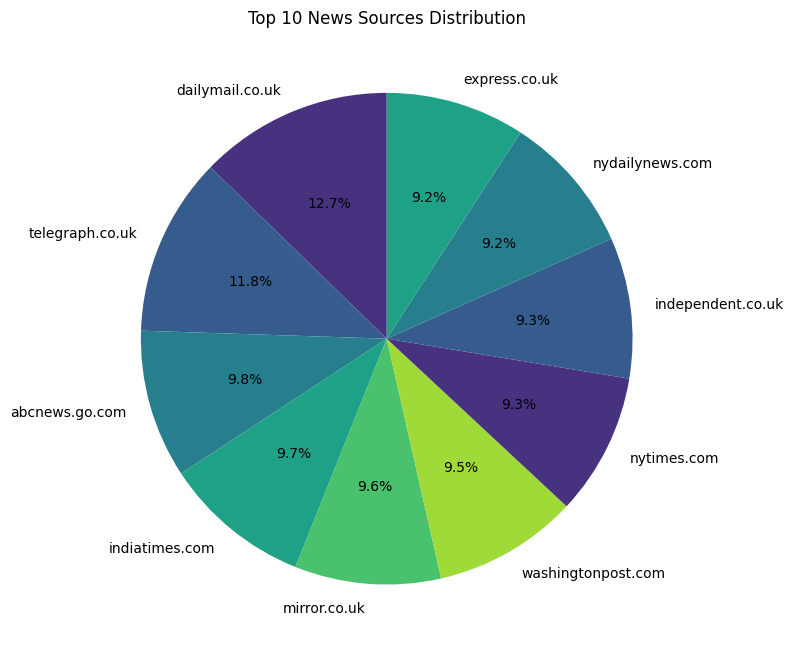

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'headlines_filtered' is the name of your dataframe
top_10_sites = headlines_filtered['site'].value_counts().nlargest(10)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_10_sites, labels=top_10_sites.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Top 10 News Sources Distribution')
plt.tight_layout()

# Show the plot
plt.show()

In [21]:
# Set a Seaborn style
sns.set(style="whitegrid")

# Assuming 'headlines_filtered' is the name of your dataframe
# Convert 'date' column to datetime format if not already
headlines_filtered['date'] = pd.to_datetime(headlines_filtered['date'])

# Group by year and calculate the average bias score
average_bias_by_year = headlines_filtered.groupby(headlines_filtered['date'].dt.year)['bias'].mean().reset_index()

# Plot the average bias score for each year
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='bias', data=average_bias_by_year, marker='o', color='purple', linewidth=2)

# Style the plot
plt.title('Average Bias Score Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Bias Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

KeyError: 'date'

In [ ]:
# Assuming 'headlines' is your DataFrame
headlines_filtered = headlines_filtered.rename(columns={'headline_no_site': 'headline'})

# Get one-hot encoding for categorical columns with 1s and 0s
headlines_filtered = pd.get_dummies(headlines_filtered, columns=['site', 'country', 'Day_of_Week', 'Month'], drop_first=True, dtype=int)